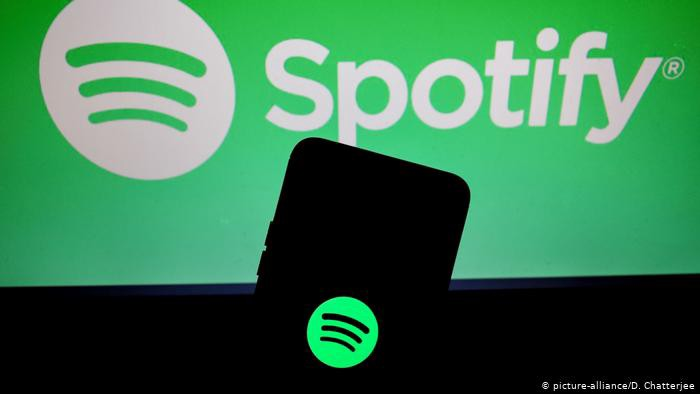

# Classificador de Músicas para o Spotify

  O Spotify é um dos serviços de streaming de áudio mais popular do mundo e grande parte desse sucesso foi conquistado usando **Ciência de Dados** para transformar a experiência do usuário em algo único e completamente customizado.

  Um bom exemplo é o algoritmo que recomenda artista para o usuário baseado em suas curtidas anteriores.

  Mas como funciona este tipo de algoritmo? É algo extremamente futurista projetado pela Skynet do filme exterminador do futuro ou simplesmente a boa e velha matématica combinada com o aprendizado de máquina?



# Sobre o projeto:

O objetivo é utilizar dados disponibilizados pelo Spotify para criar um classificador que identifica possíveis músicas que um usuário possa gostar.


In [ ]:
# importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

### Lendo a base de dados

In [ ]:
# Cria uma váriavel que recebe o arquivo csv com as informações do spotify
df_spotify = pd.read_csv('/content/drive/My Drive/Data Science/semana-data-science/data_spotify.csv', sep=',')

### Informações do Dataset

In [ ]:
# Informações do dataset
df_spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


In [ ]:
df_spotify.head()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


# Entendendo as colunas do Dataset:

**'id'** :O número de identificação da música

**'acousticness'** :Indica se a música é ou não acústica, 0,0 para não acústica e 1,0 para o máximo de acusticidade.

**'danceability'**: Descreve se a música é "dançável" com base em uma combinação de elementos musicais. Um valor de 0,0 é menos dançável e 1,0 é mais dançante.

**'duration_ms'**: A duração da faixa de música em milissegundos

**'energy'**: Se a música é agitada ou não 0,0 (menos energética possivel) a 1,0 (mais energética possivel). 

**'instrumentalness'** Prediz se uma faixa não contém vocais. Os sons “Ooh” e “aah” são tratados como instrumentais neste contexto. Faixas de rap ou palavra falada são claramente “vocais”. Quanto mais próximo o valor da instrumentalidade estiver de 1,0, maior será a probabilidade de a faixa não conter conteúdo vocal. Valores acima de 0,5 destinam-se a representar faixas instrumentais, mas a confiança é maior à medida que o valor se aproxima de 1,0.

**'key'** Tom da música, onde:
0 = C
1 = Db
2 = D
3 = Eb
4 = E
5 = F
6 = Gb
7 = G
8 = Ab
9 = A
10 = Bb
11 = B

**'liveness'**: Detecta a presença de um público na gravação.

**'loudness'**: O volume geral de uma faixa em decibéis (dB). Os valores de intensidade são calculados em toda a faixa e são úteis para comparar a intensidade relativa das faixas. Loudness é a qualidade de um som que é o principal correlato psicológico da força física (amplitude). Os valores variam entre -60 e 0 db.

**'speechiness'**: Detecta a presença de palavras faladas em uma faixa. Por exemplo se o usuário gosta de PodCasts.

**'tempo'**: Tempo musical (duração de cada unidade do compasso).

**'valence'**: Uma medida de 0,0 a 1,0 que descreve a positividade musical transmitida por uma faixa. Faixas com alta valência soam mais positivas (por exemplo, feliz, alegre, eufórico), enquanto faixas com baixa valência soam mais negativas (por exemplo, triste, deprimido, zangado).

**'target'** Coluna que será usada para a classificação:
Valor 0 = o usuário não gostou da música, valor = 1 significa que o usuário gostou da música.

**'song_title'** Nome da faixa.

**'artist'** O nome do artista ou banda.



### Checando valores faltantes no dataset

In [ ]:
#checking missing values
df_spotify.isnull().sum()

id                  0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

### Descrição estatística do dataset
Média, mediana, desvio padrão e quartis 

In [ ]:
df_spotify.describe()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


### No plot a seguir podemos verificar que quanto mais "acustica" é a música menos "dançável" ela é

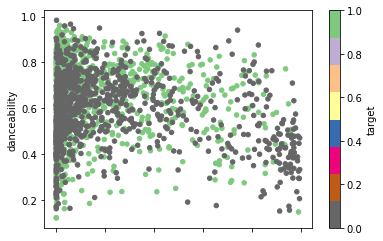

In [ ]:
#podemos verificar que quanto mais "acustica" é a musica menos "dançavel" ela é
%matplotlib inline
df_spotify.plot('acousticness', 'danceability', c='target', kind='scatter', colormap='Accent_r')

### Podemos observar a seguir que quanto mais dançável é a música maior a sua energia

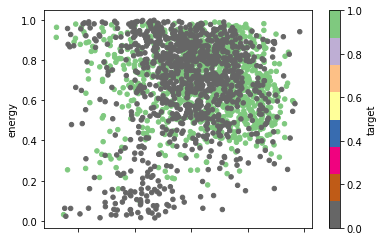

In [ ]:
df_spotify.plot(x='danceability', y='energy', c='target', kind='scatter', colormap='Accent_r')

### Correlação entre as variáveis


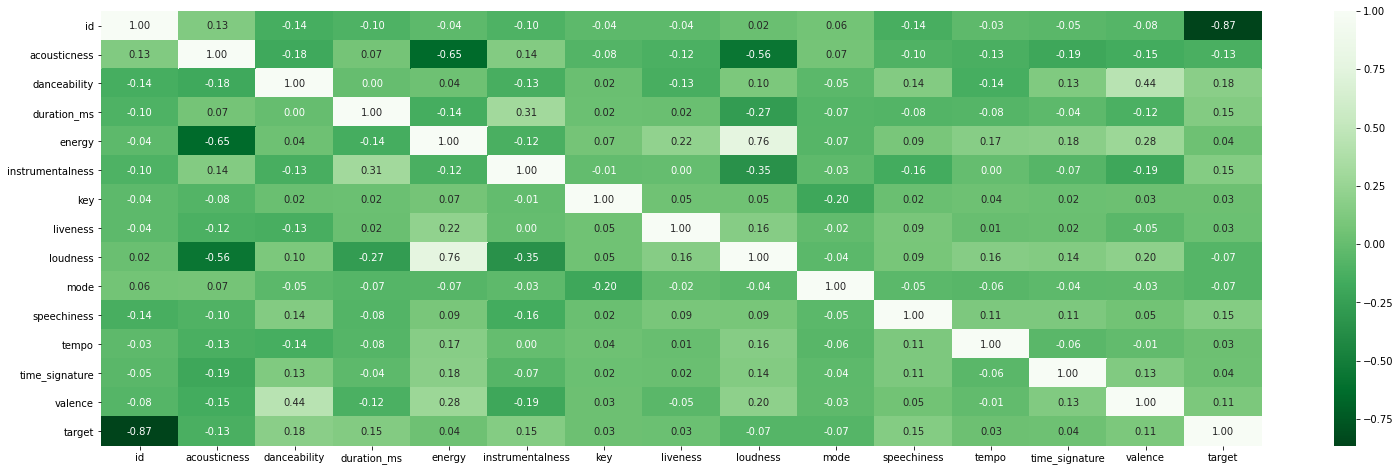

In [ ]:
df_num = df_spotify.drop(['song_title', 'artist'], axis=1)
plt.figure(figsize=(26,8))
sns.heatmap(df_num.corr(), annot = True, fmt ='.2f',cmap='Greens_r')

In [ ]:
df_spotify.head()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [ ]:
#removendo colunas que não vamos usar para treinar o modelo
df_spotify.drop(['id','song_title'], axis=1, inplace=True)

# Pré Processamento dos dados

## Separando os dados e classes e usando o LabelEncoder

In [ ]:
classes = df_spotify['target']
df_spotify.drop('target', axis=1, inplace=True)

Label encoder é uma técnica para codificar valores categóricos em numéricos 

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
#instanciando objeto labelencoder
enc = LabelEncoder()

### Cria uma nova coluna com os valores de 'artist' já transformados pelo encoder

In [ ]:
inteiros = enc.fit_transform(df_spotify['artist'])
df_spotify['artista_inteiro'] = inteiros

In [ ]:
# Visualizando o dataset
df_spotify.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,artist,artista_inteiro
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,Future,449
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,Childish Gambino,222
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,Future,449
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,Beach House,95
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,Junior Boys,628


In [ ]:
#removendo a coluna artist str
df_spotify.drop('artist', axis=1, inplace=True)

# SVM (Support Vector Machine)

* Com nossos dados já processados vamos para a parte do modelo de machine learning.

* O modelo escolhido foi o SVM que é um algoritmo de aprendizado supervisionado que pode ser usado tanto para problemas de classificação como de regressão.

* Basicamente o SVM cria uma fronteira separando os dados da melhor forma, esta fronteira é chamada de hiperplano.

* Após traçar o hiperplano os valores mais próximos deles serão nossos Vetores de suporte e baseados neles nosso algoritmo irá classificar nossos dados.

* Para mais informações sobre o SVM acesse este [link](https://towardsdatascience.com/support-vector-machines-svm-c9ef22815589).




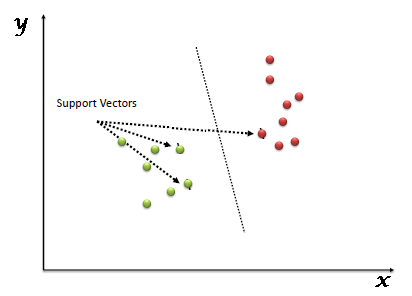

Imagrem retirada do site [towardsdatascience.com](https://towardsdatascience.com/support-vector-machines-svm-c9ef22815589)

Após escolhermos nosso modelo vamos criar pipelines para automatizar nossos testes nos dando tempo e um código mais limpo.

# Pipelines

### Os pipelines funcionam como uma forma de encapsulamento de código automatizando os testes nos códigos de Machine Learning.

In [ ]:
# importando o modelo
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#treinando o modelo
clf = svm.SVC()
clf.fit(df_spotify, classes)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# Criando o primeiro Pipeline
pip_1 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', svm.SVC())
])

In [ ]:
#passos do pipeline 1
pip_1.steps

[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
 ('clf',
  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
      max_iter=-1, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False))]

In [ ]:
# Criando pipelines
pip_2 = Pipeline([
                  ('min_max_scaler',MinMaxScaler()),
                  ('clf', svm.SVC())
])

pip_3 = Pipeline([
                  ('scaler', StandardScaler()),
                  ('clf', svm.SVC(kernel='sigmoid'))
])

pip_4 = Pipeline([
                  ('scaler', StandardScaler()),
                  ('clf', svm.SVC(kernel='poly'))
])

pip_5 = Pipeline([
                  ('scaler', StandardScaler()),
                  ('clf', svm.SVC(kernel='linear'))
])

In [ ]:
#passos do pipeline 2
pip_2.steps

[('min_max_scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
 ('clf',
  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
      max_iter=-1, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False))]

# Validação Cruzada

A [validação cruzada](https://pt.wikipedia.org/wiki/Valida%C3%A7%C3%A3o_cruzada) é uma técnica para avaliar a capacidade de generalização de um modelo, a partir de um conjunto de dados. Esta técnica é amplamente empregada em problemas onde o objetivo da modelagem é a predição. Busca-se então estimar o quão preciso é este modelo na prática, ou seja, o seu desempenho para um novo conjunto de dados.

In [ ]:
#com o pipeline 1 obtivemos uma acuracia de 71% no modelo
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
resultados = cross_val_predict(pip_1, df_spotify, classes, cv=10)
print(metrics.accuracy_score(classes, resultados))

0.7149231531978185


In [ ]:
#com o pipeline 2 obtivemos uma porcentagem menor de acuracia
resultados2 = cross_val_predict(pip_2, df_spotify, classes, cv=10)
print(metrics.accuracy_score(classes, resultados2))

0.6757560733763014


In [ ]:
#criando uma função para retornar as acuracias
def Acuracia(clf, X, y):
  resultados = cross_val_predict(clf, X, y, cv=10)
  return metrics.accuracy_score(y, resultados)

In [ ]:
Acuracia(pip_5, df_spotify, classes)

0.6236985622211205

# Teste de Overfitting

[Overfitting](https://pt.wikipedia.org/wiki/Sobreajuste) é um termo usado em estatística para descrever quando um modelo estatístico se ajusta muito bem ao conjunto de dados anteriormente observado, mas se mostra ineficaz para prever novos resultados.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_spotify, classes, test_size=0.2, random_state=123)

In [ ]:
#escala os dados de treino e teste
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

scaler2 = StandardScaler().fit(X_test)
X_test = scaler2.transform(X_test)

In [ ]:
#treinando o algoritmo
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#prevendo
y_pred = clf.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
#imprimindo a acuracia
metrics.accuracy_score(y_test, y_pred)

0.7351485148514851

In [ ]:
#testando a classificação com o proprio teste
y_pred2 = clf.predict(X_train)
y_pred2

array([0, 1, 1, ..., 0, 0, 0])

In [ ]:
metrics.accuracy_score(y_train, y_pred2)

0.815251084934904

# Tunning do modelo usando o gridsearch

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#criando valores para o c e para o gamma
lista_c = [0.001, 0.01, 0.1, 1, 10,100]
lista_gamma = [0.001, 0.01, 0.1, 1, 10, 100]

In [ ]:
parametros_grid = dict(clf__C=lista_c, clf__gamma=lista_gamma)

In [ ]:
grid = GridSearchCV(pip_1, parametros_grid, scoring='accuracy', cv=10)

In [ ]:
grid.fit(df_spotify, classes)

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('clf',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.00

### Resultados GridSearch

In [ ]:
grid.best_params_

{'clf__C': 100, 'clf__gamma': 0.01}

In [ ]:
grid.best_score_

0.720858578395153

### Aplicando os melhores valores e avaliando o modelo

In [ ]:
pip_6 = Pipeline([
                  ('scaler', StandardScaler()),
                  ('clf', svm.SVC(C=100, gamma=0.01, kernel='rbf'))

])

In [ ]:
resultados = cross_val_predict(pip_6, df_spotify, classes, cv=10)
resultados

array([1, 1, 1, ..., 0, 1, 0])

In [ ]:
print(metrics.classification_report(classes, resultados))

              precision    recall  f1-score   support

           0       0.71      0.75      0.73       997
           1       0.74      0.70      0.72      1020

    accuracy                           0.72      2017
   macro avg       0.72      0.72      0.72      2017
weighted avg       0.72      0.72      0.72      2017



Após realizarmos todos as etapas de tunning do algoritmo usando a técnica GridSearch é possível identificarmos que depois que encontramos os melhores parâmetros de treino obtivemos um modelo com uma precisão de 71% e uma acurácia de 72% que são valores muito bons para o nosso classificador.

Muito obrigado pela leitura deste notebook!

[Linkedin](https://www.linkedin.com/in/danilo-felipe-neto-972b45120/)

[GitHub](https://github.com/danilofneto)

[Medium](https://medium.com/@danilofelipeneto)